In [73]:
import numpy as np
from numpy.linalg import matrix_power
from scipy.linalg import expm
from scipy.linalg import eig
from matplotlib.pyplot import *
import math
import random as rm
from numpy import sqrt,pi,e,cos,sin,tan
from scipy.optimize import minimize
from scipy import misc as ms
import time

In [66]:
def choose(n,r):
    f = math.factorial  
    return f(n) / f(r) / f(n-r)

def squoose(n,r):
    m = min(r, n-r)
    fm = math.factorial(m)
    prod = 1.
    for i in range(m):
        prod*= (n-i)/(float(m-i))
    return sqrt(prod)

#def comb(n,w,v,k):
#    return choose(w,k)*choose(n-w,v-k)*sqrt(1.*choose(n,w)/(choose(n,v+w-2*k)))

def trig(n,v,b):
    return (cos(b)**(n-v))*(1.0j*sin(b))**v
#def diffuse(n, fw, b):  # "applies the diffusion operator on a hamming symmetric state
#    out = (n+1)*[0.0+0.0j]
#    for w in range(n+1):
#        for v in range(n+1):
#            for k in range(max(0,v+w-n),min(v,w)+1):
#                out[w+v-2*k] += fw[w]*comb(n,w,v,k)*trig(n,v,b)
#    out = map(lambda x: x*e**(-1.0j*b*n),out)
#    return out
def diffuse(n,fw,b):
    H0 = symH0(n)
    return np.dot(expm(-1.0j*b*H0),fw)
def diff0(n,fw,b):  # only compute the diffused amplitude at w=0. it's faster
    out=0
    for w in range(n+1):
        out+= fw[w]*trig(n,w,b)/squoose(n,w)
    return e**(-1.0j*b*n)*out
def merit(n,fw):
    a=2./2**(n)*sum(map(lambda w: fw[w]*squoose(n,w),range(n+1)))
    return 1.-np.abs(1.-a)**2                                     
def diffopt(n,f0,err,T):
    angles=[]
    anglesum=0
    f=f0
    for i in range(T):
        plot(f)
        p0=0.
        angle=0.
        while(p0<(i+1)*err):
            angle+=0.01
            b = anglesum+angle
            p0=np.real(1-diff0(n,f,angle))
        angles.append(angle)
        anglesum+=angle
        f=diffuse(n,f,angle)
        f[0] = 1-f[0]
        print merit(n,f)
    show()
    return angles
def state0(n):
    tN = 1./2.**(n/2.)
    p   = np.zeros(n+1) # initialized probability vector in reduced basis
    seed = 1.
    for i in range(n+1):
        p[i] = seed # recursively produce N-choose-j (see next line)
        seed *= np.sqrt((n-i)/(i+1.))
    return tN*p # duplicates probabilities for z0=0 and 1


def diffopt(n,f0,improvement,T):
    angles=[]
    anglesum=0
    f=f0
    oldmerit=0
    for i in range(T):
        plot(f)
        angle=0.
        dmerit=0.
        while(dmerit<improvement):
            angle+=0.001
            b = anglesum+angle
            m = merit(n,map(lambda x: x*e**(-1.0j*b*n),f))
            dmerit=m-oldmerit #np.real(1-(e**(-1.0j*b*n)*diff0(n,f,angle)))
        angles.append(angle)
        anglesum+=angle
        f=diffuse(n,f,angle)
        f[0] = e**(1.0j*anglesum*n)-f[0]
        oldmerit=merit(n,map(lambda x: x*e**(-1.0j*anglesum*n),f)) 
        print oldmerit
    show()
    return angles


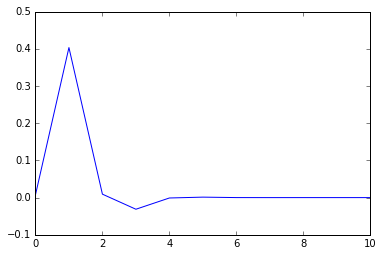

In [146]:
n=50
plot(map(np.imag,diffuse(n,map(lambda x: e**(-0.1*x**2),range(n+1)),pi/50)));xlim(0,10);show()

In [66]:
#plot(map(lambda x: comb(n,0,x,),range(n+1)));show()

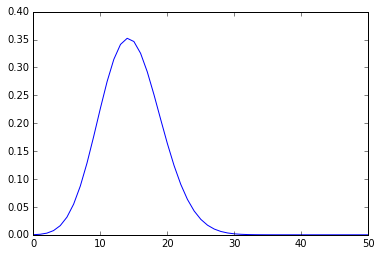

In [711]:
plot(np.abs(diffuse(50,[1.]+(50)*[0.],4./sqrt(50))));xlim(0,50);show()

In [37]:
def diffopt2(n,f0,beta,T): # carries out a Grover for time T on initial state given by f0 and diffusion angle beta
    angles=[]
    f=f0
    fzero=[1]
    for i in range(T):
        dbeta = pi/(2*n)#0.0*beta*(2*rm.random()-1)
        f=diffuse(n,f,beta)
#        f = map(lambda x: e**(-1.0j*(beta)*n)*x, f)
        f[0] = 1.+0.j-f[0]
        fzero.append(f[0])
    print merit(n,f)
    plot(fzero)
    show()
    return f    

def diffopt3(n,f0,err,T):
    angles=[]
    f=f0
    fzero = [1]
    for i in range(T):
        #plot(f)
        p0=1.e8
        angle=0.
        for j in range(630):
            b=0.01*j
            if p0>np.real(diff0(n,f,angle)): angle=b
            p0=min(p0,np.real(diff0(n,f,angle)))
        #print p0
        angles.append(angle)
        f=diffuse(n,f,angle)
        f[0] = 1.-f[0]
    plot(f)
    show()
    print merit(n,f)
    return angles

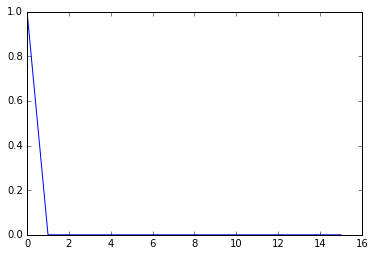

0.00012206658721


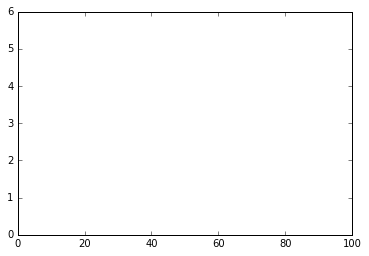

In [209]:
n=15
plot(diffopt3(n,[1.+0.j]+n*[0.],0.05,100));ylim(0,6);show()

In [175]:
map(lambda x: x*e**(-1.0j*pi),[1,2,3])

[(-1-1.2246467991473532e-16j),
 (-2-2.4492935982947064e-16j),
 (-3-3.6739403974420594e-16j)]

In [216]:
e**(-1.0j*pi)

(-1-1.2246467991473532e-16j)

In [246]:
a = [1+0.2j,2.,3.,4.]
a=map(lambda x: -1.0*x, a)
a

[(-1-0.2j), -2.0, -3.0, -4.0]

0.793249697327


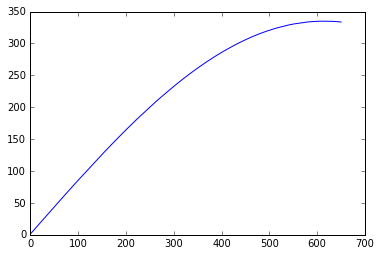

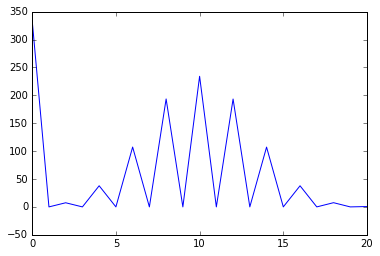

In [210]:
n=20
plot(np.real(diffopt2(n,[1.+0.j]+n*[0.],pi/(n),650)))#/np.array(map(lambda r: sqrt(choose(n,r)),range(n+1))));ylim(0,30);show()
show()

7.56214364683e-07


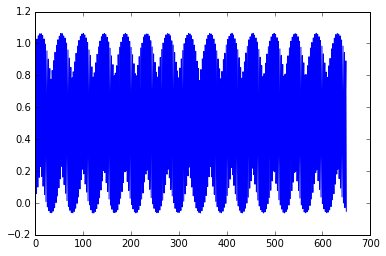

array([ -5.23727446e-02,   4.28888121e-02,   5.23743661e-03,
         1.51630917e-03,   1.60574881e-04,  -1.80611177e-04,
        -2.12747183e-05,   6.54405036e-05,   6.30855168e-05,
         4.48946395e-05,  -2.14357316e-05,  -7.62198015e-05,
        -3.49849654e-05,   2.48906651e-05,  -2.05161869e-05,
        -1.79360029e-04,   7.38642512e-05,   1.42529840e-03,
         1.20570856e-04,  -6.71185757e-03,   6.58944587e-03])

In [211]:
np.real(diffopt2(n,[1.+0.j]+n*[0.],0.05,650))/np.array(map(lambda r: squoose(n,r),range(n+1)))

In [68]:
# Multiple marked items. Here, we have k marked items that are distributed "homogeneously", i.e., from any marked
# item, the distance distribution of the other marked items looks identical. We call this distribution p[w].
# Returns the success probability over number of iterations. 

def grovMult(n,k,f0,p,b,g,T):
    f = f0
    success=[f[0]];
    s = 1
    for i in range(T):
        fdiff = diffuse(n,f,b)
        f0mult = (1-np.exp(s*g*1.0j))*sum(map(lambda w: p[w]*fdiff[w]/squoose(n,w),range(n+1)))
        fdiff[0] -= f0mult
        f = fdiff
#        fzero.append(f[0])
        success.append(1./k*np.abs(sum(map(lambda w: p[w]/squoose(n,w)*f[w], range(n+1))))**2)
#    plot(1./(T+1)*np.arange(T+1), success); show()
        s = s
    return success

def symH0(n):
    H0 = n*np.identity(n+1)
    for i in range(n):
        H0[i,i+1] = -np.sqrt((i+1)*(n-i))
        H0[i+1,i] = -np.sqrt((i+1)*(n-i))
    return H0

def grovMap(n,f0,p,b,T):
    f   = f0
    Cp  = np.identity(n+1) - 2*np.array([map(lambda w: p[w]/squoose(n,w), range(n+1))]+n*[(n+1)*[0]])
    B   = expm(1.0j*b*symH0(n))
    CB  = np.dot(B,Cp)
    CBT = matrix_power(CB,T)
    return np.dot(CBT,f)

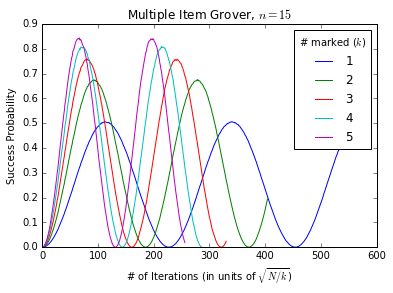

In [12]:
for k in [1, 2,3,4,5]:#,20,50, 100]:
    n = 15
    #k = 10
#p = 2*([1.]+9*[0.])+[0]
    p = map(lambda x: (k-1)/sqrt(pi*n/2.)*e**(-2./n*(x-n/2.)**2),range(n+1))
    p[0]=1.
#plot(p);show()
    f0 = state0(n)
    T = np.int(sqrt(10*2.**n/k))
    success = grovMult(n,k,f0,p,pi/n,1.00*pi,T)
#    plot(1./(2*np.int(sqrt(2.**n/k)))*np.arange(T+1), success, label='%d'%k)  
    plot(np.arange(T+1), 1/0.78*np.array(success), label='%d'%k)  
    
xlabel("# of Iterations (in units of $\sqrt{N/k}$)")
#xlim(0.15,0.7)
#ylim(0.5,0.7)
ylabel("Success Probability")
title("Multiple Item Grover, $n=%d$"%n)
legend(title='# marked ($k$)',loc='upper right')
#savefig('successPr_n13_kwiderange.png')
show()

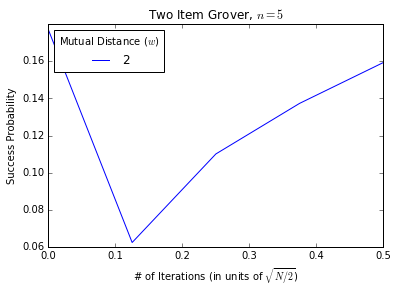

In [50]:
# Here we explore the case when k=2, and look at all possible Hamming distance cases for a fixed n
n=5
for w in range(2,3):
    p=(n+1)*[0.]
    p[0]=1.
    p[w]=1.
    f0 = state0(n)
    T = np.int(sqrt(1.5*2.**n/2.))
    success = grovMult(n,2,f0,p,pi/n,pi,T)
    plot(1./(2*np.int(sqrt(2.**n/2)))*np.arange(T+1), success, label='%d'%w)
xlabel("# of Iterations (in units of $\sqrt{N/2}$)")
#xlim(0.15,0.7)
#ylim(0.5,0.7)
ylabel("Success Probability")
title("Two Item Grover, $n=%d$"%n)
legend(title='Mutual Distance ($w$)',loc='upper left')
savefig('successPr_n15_k2_midDist.png')
show()

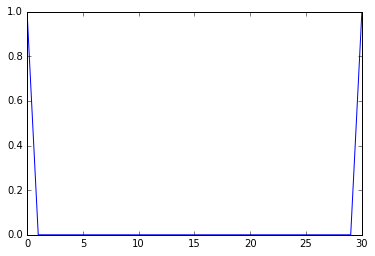

0.315080540797


In [625]:
n = 30
k = 2
p = [1.]+(n-1)*[0.]+[1.]
#p = map(lambda x: (k-1.)/sqrt(pi*n/2.)*e**(-2./n*(x-n/2.)**2),range(n+1))
#p[0]=1.
plot(p);show()
f0 = map(lambda w: 1/sqrt(sqrt(pi*n/2.))*e**(-1./n*(w-n/2.)**2)/k,range(n+1))
ffinal = grovMap(n,f0,p,pi/n,np.int(0.8*2.**(n/2.)/sqrt(k)))
print k*np.abs(sum(map(lambda w: p[w]/sqrt(choose(n,w))*ffinal[w], range(n+1))))**2

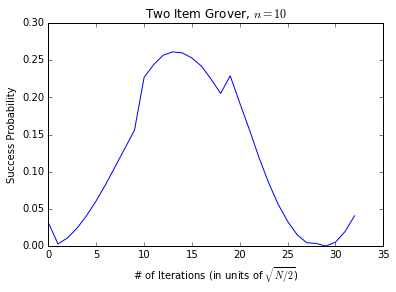

[0.03125,
 0.0029296874999999965,
 0.011199523660044598,
 0.02431631989926579,
 0.041211706711411979,
 0.061124633617893373,
 0.083375701596452995,
 0.10740840985993977,
 0.13166198275471508,
 0.15611441292167272,
 0.22692909957800636,
 0.24402449085367356,
 0.25666252719358651,
 0.26113322075121581,
 0.25967994744314526,
 0.25294736436429521,
 0.24184873983346314,
 0.22452786466094557,
 0.20524991251109873,
 0.22895181839129033,
 0.19238963549143942,
 0.15680930360079826,
 0.11954931254866022,
 0.085712756081965019,
 0.056666266517407061,
 0.03340329276813768,
 0.015302983173949829,
 0.0045606340459987665,
 0.0036376837543101383,
 7.1563341572070683e-05,
 0.0053011221997516971,
 0.019484407660352483,
 0.040789238272572609]

In [78]:
n=10
#for w in [6,7,8,9]:
p=(n+1)*[0.]
p[0]=1.
p[1]=0.
p[2]=2.
p[4]=0.
k=3
f0 = state0(n)
T = np.int(sqrt(3*2.**n/k))
success = grovMult(n,k,f0,p,pi/n,pi,T)
plot(success, label='%d'%k)
xlabel("# of Iterations (in units of $\sqrt{N/2}$)")
#xlim(0.15,0.7)
#ylim(0.5,0.7)
ylabel("Success Probability")
title("Two Item Grover, $n=%d$"%n)
#legend(title='Mutual Distance ($w$)',loc='upper left')
show()
success

In [519]:
sum(map(lambda x: x**2,f0))

0.99999998733372009

In [607]:
# This function computes the optimal time to compute for multiple marked items
def maxiter(n,k):
    p = map(lambda x: (k-1.)/sqrt(pi*n/2.)*e**(-2./n*(x-n/2.)**2),range(n+1))
    p[0]=1
    f0 = map(lambda w: 1/sqrt(sqrt(pi*n/2.))*e**(-1./n*(w-n/2.)**2)/k,range(n+1))
    choo = map(lambda w: 1./sqrt(choose(n,w)),range(n+1)) # array of n choose w
    Prt = lambda t: -k*np.abs(sum(map(lambda w: p[w]*choo[w]*grovMap(n,f0,p,pi/n,np.int(t*2.**(n/2.)/sqrt(k)))[w],range(n+1))))**2
    opt = minimize(Prt, [0.8], method='nelder-mead', bounds=[(0.1,2)], options={'xtol': 1e-8, 'disp': False})
    return opt.x[0]

In [600]:
n=30
k=30
p = map(lambda x: (k-1.)/sqrt(pi*n/2.)*e**(-2./n*(x-n/2.)**2),range(n+1))
p[0]=1
f0 = map(lambda w: 1/sqrt(sqrt(pi*n/2.))*e**(-1./n*(w-n/2.)**2)/k,range(n+1))
Tmin=0#np.int(0.1*2.**(n/2.)/sqrt(k))
Tmax=2#np.int(2.1*2.**(n/2.)/sqrt(k))
choo = map(lambda w: 1./sqrt(choose(n,w)),range(n+1)) # array of n choose w
Prt = lambda t: -k*np.abs(sum(map(lambda w: p[w]*choo[w]*grovMap(n,f0,p,pi/n,np.int(t*2.**(n/2.)/sqrt(k)))[w], range(n+1))))**2
opt = minimize(Prt, [Tmin], method='nelder-mead', bounds=[(Tmin,Tmax)], options={'xtol': 1e-8, 'disp': False})

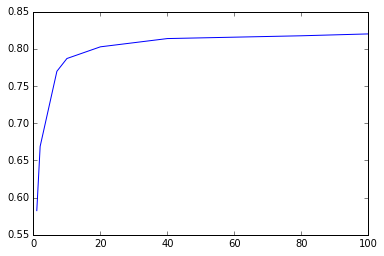

In [621]:
plot([1,2,7,10,20,40,80,100],map(lambda k: maxiter(30,k),[1,2,7,10,20,40,80,100]));show()

In [617]:
opt.x[0]

0.80875000000000086

In [2]:
ms.comb(30,15)

NameError: name 'ms' is not defined

In [16]:
choose(30,5)

142506L

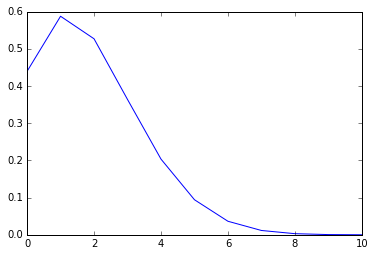

(2.22044604925e-16+1.19695919842e-16j)


In [31]:
n = 10
b = 0.4
H0 = symH0(n)
eH = expm(-1.0j*b*H0)
plot(np.abs(eH[0])); show()
print np.vdot(eH[0],eH[:,1])

In [54]:
start = time.time()
n = 5
b = 0.157
H0 = b*symH0(n)
expm(-1.0j*H0)

array([[  6.64943691e-01 -6.64414389e-01j,
          2.35186646e-01 +2.35374006e-01j,
         -5.26941160e-02 +5.26521710e-02j,
         -8.33498667e-03 -8.34162669e-03j,
          9.33736593e-04 -9.32993330e-04j,
          6.60514207e-05 +6.61040402e-05j],
       [  2.35186646e-01 +2.35374006e-01j,
          5.98290320e-01 -5.97814075e-01j,
          2.86307632e-01 +2.86535718e-01j,
         -6.95154815e-02 +6.94601465e-02j,
         -1.04769654e-02 -1.04853119e-02j,
          9.33736593e-04 -9.32993330e-04j],
       [ -5.26941160e-02 +5.26521710e-02j,
          2.86307632e-01 +2.86535718e-01j,
          5.66216374e-01 -5.65765660e-01j,
          2.99787523e-01 +3.00026346e-01j,
         -6.95154815e-02 +6.94601465e-02j,
         -8.33498667e-03 -8.34162669e-03j],
       [ -8.33498667e-03 -8.34162669e-03j,
         -6.95154815e-02 +6.94601465e-02j,
          2.99787523e-01 +3.00026346e-01j,
          5.66216374e-01 -5.65765660e-01j,
          2.86307632e-01 +2.86535718e-01j,
        

In [26]:
e,v = eig(H0)
e

array([ -8.45989945e-13+0.j,   2.00000000e+00+0.j,   4.00000000e+00+0.j,
       ...,   7.82000000e+02+0.j,   8.24000000e+02+0.j,
         8.34000000e+02+0.j])

In [15]:
a = np.loadtxt('success_n=20_m=10_0.dat')
b = np.loadtxt('success_n=20_m=10_1.dat')
c = np.loadtxt('success_n=20_m=10_2.dat')
d = np.loadtxt('success_n=20_m=10_3.dat')
e = np.loadtxt('success_n=20_m=10_4.dat')

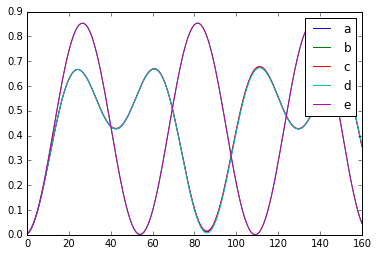

In [18]:
plot(a, label="a"); plot(b, label="b"); plot(c, label="c"); plot(d, label="d");plot(e, label="e"); legend(); show()

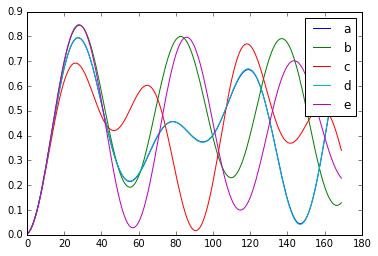

In [19]:
a = np.loadtxt('success_n=20_m=9_0.dat')
b = np.loadtxt('success_n=20_m=9_1.dat')
c = np.loadtxt('success_n=20_m=9_2.dat')
d = np.loadtxt('success_n=20_m=9_3.dat')
e = np.loadtxt('success_n=20_m=9_4.dat')
plot(a, label="a"); plot(b, label="b"); plot(c, label="c"); plot(d, label="d");plot(e, label="e"); legend(); show()

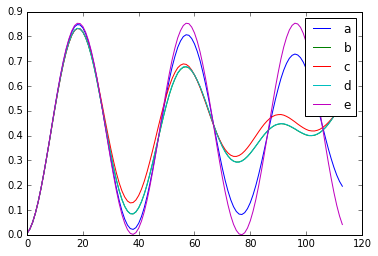

In [20]:
a = np.loadtxt('success_n=20_m=20_0.dat')
b = np.loadtxt('success_n=20_m=20_1.dat')
c = np.loadtxt('success_n=20_m=20_2.dat')
d = np.loadtxt('success_n=20_m=20_3.dat')
e = np.loadtxt('success_n=20_m=20_4.dat')
plot(a, label="a"); plot(b, label="b"); plot(c, label="c"); plot(d, label="d");plot(e, label="e"); legend(); show()

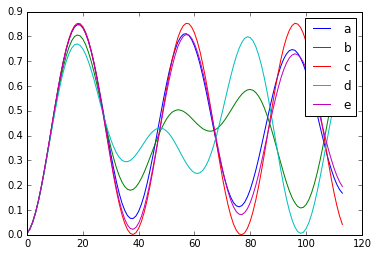

In [22]:
a = np.loadtxt('success_n=20_m=20_0_acyc.dat')
b = np.loadtxt('success_n=20_m=20_1_acyc.dat')
c = np.loadtxt('success_n=20_m=20_2_acyc.dat')
d = np.loadtxt('success_n=20_m=20_3_acyc.dat')
e = np.loadtxt('success_n=20_m=20_4_acyc.dat')
plot(a, label="a"); plot(b, label="b"); plot(c, label="c"); plot(d, label="d");plot(e, label="e"); legend(); show()

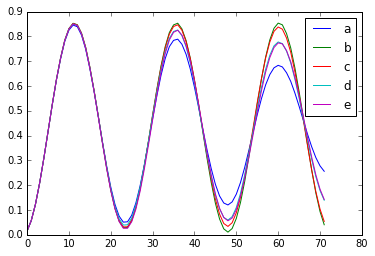

In [23]:
a = np.loadtxt('success_n=20_m=50_0_acyc.dat')
b = np.loadtxt('success_n=20_m=50_1_acyc.dat')
c = np.loadtxt('success_n=20_m=50_2_acyc.dat')
d = np.loadtxt('success_n=20_m=50_3_acyc.dat')
e = np.loadtxt('success_n=20_m=50_4_acyc.dat')
plot(a, label="a"); plot(b, label="b"); plot(c, label="c"); plot(d, label="d");plot(e, label="e"); legend(); show()

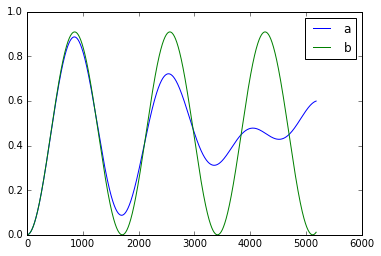

In [24]:
a = np.loadtxt('success_n=30_m=10_0_acyc.dat')
b = np.loadtxt('success_n=30_m=10_1_acyc.dat')
plot(a, label="a"); plot(b, label="b"); legend(); show()

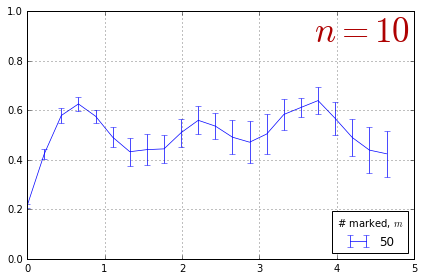

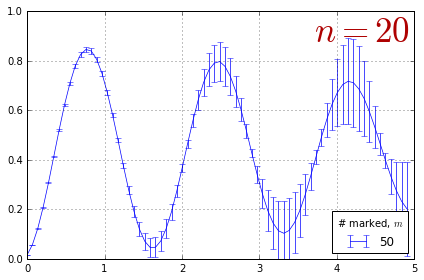

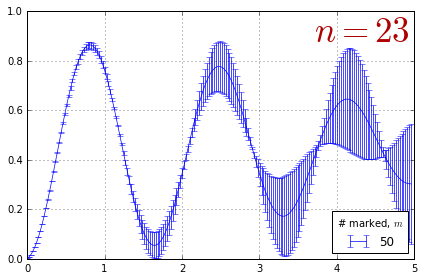

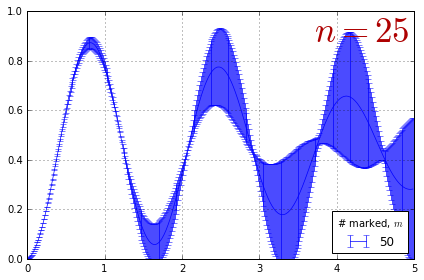

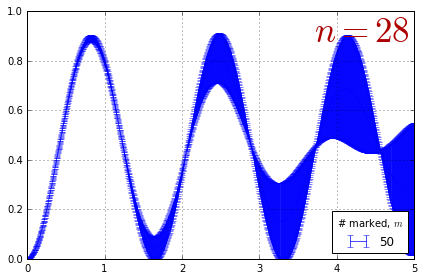

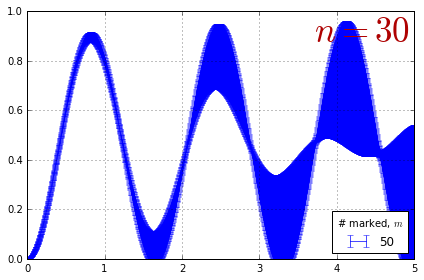

In [77]:
nvalues = [10, 20, 23, 25, 28, 30]
mvalues = [50]
peaksets=[]
Tsets = []
for n in nvalues:
    peak=[]
    T=[]
    for m in mvalues:
        a = []
        xaxis = np.loadtxt('n%d/success_n=%d_m=%d_%d_acyc.dat'%(n,n,m,0))[:,0]
        for i in range(30):
            a.append(np.loadtxt('n%d/success_n=%d_m=%d_%d_acyc.dat'%(n,n,m,i))[:,1])
        a = np.array(a)
        means = np.array(map(np.mean, a.T))
        stds = map(np.std, a.T)
        T.append(xaxis[np.argmax(means[xaxis < 1.2*sqrt(2.**n/m)])]/sqrt(2.**n/m))
        peak.append(np.max(means))
        errorbar(xaxis/sqrt(2.**n/m), means, label='%d'%m, linewidth=0.7, yerr=stds)
    peaksets.append(peak)
    Tsets.append(T)
    grid(1)
    ylim(0,1)
    legend(loc='lower right', title='# marked, $m$')
    #xlabel('$g$, where $T = g\sqrt{\\frac{N}{m}}$',size=16)
    #ylabel('Probability of success', size=16)
    text(3.7,0.88,'$n=%d$'%n,size=35,color='#AE0000')
    tight_layout()
    #savefig('poster/successVtime_n%d_varm.png'%n,dpi=150)
    show()

#for i in range(100):
#    a = np.loadtxt('n%d/success_n=%d_m=%d_%d_acyc.dat'%(n,n,m,i))
#    plot(a[:,0]/sqrt(2.**n/m),a[:,1])
#show()

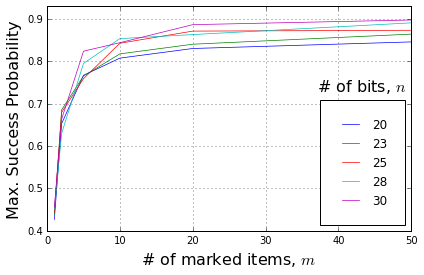

In [65]:
for i in range(1,len(nvalues)): plot(mvalues, np.array(peaksets[i]), label='%d'%nvalues[i], linewidth=0.7)
legend(loc='lower right', borderpad=1.5)
text(37, 0.73,'# of bits, $n$', size=16)
xlabel('# of marked items, $m$',size=16)
ylabel('Max. Success Probability', size=16)
tight_layout()
ylim(0.4,0.93)
grid(1)
#plot(range(50),[0.9]*50,'--r')
savefig('maxPr.png', dpi=150)
show()

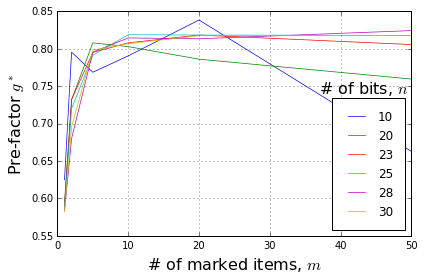

In [72]:
for i in range(0,len(nvalues)): plot(mvalues, Tsets[i], label='%d'%nvalues[i], linewidth=0.7)
legend(loc='lower right', borderpad=1)
text(37, 0.74,'# of bits, $n$', size=16)
xlabel('# of marked items, $m$',size=16)
ylabel('Pre-factor $g^*$', size=16)
tight_layout()
#ylim(0.4,0.93)
grid(1)
#plot(range(50),[0.9]*50,'--r')
savefig('prefactor.png', dpi=150)
show()

TypeError: only length-1 arrays can be converted to Python scalars

In [58]:
means

[0.0047730000000000003,
 0.011535000000000002,
 0.021027000000000004,
 0.033020000000000015,
 0.047307000000000002,
 0.06370000000000002,
 0.082197999999999993,
 0.098024000000000028,
 0.13414800000000002,
 0.15930800000000006,
 0.18173,
 0.20302099999999995,
 0.22312300000000004,
 0.24182099999999995,
 0.25878900000000005,
 0.27630999999999994,
 0.27821699999999994,
 0.30927699999999997,
 0.32593400000000006,
 0.33216600000000018,
 0.33274399999999998,
 0.32934900000000006,
 0.32267399999999991,
 0.31222499999999992,
 0.30505199999999999,
 0.27581499999999992,
 0.27372399999999991,
 0.26538799999999996,
 0.24730299999999991,
 0.22411199999999998,
 0.19885000000000005,
 0.173267,
 0.14637700000000006,
 0.12719399999999995,
 0.094260999999999984,
 0.078012000000000026,
 0.064386000000000013,
 0.048766000000000011,
 0.033155999999999991,
 0.019669000000000006,
 0.0095930000000000008,
 0.0026069999999999995,
 0.000321,
 0.0015280000000000005,
 0.0062010000000000025,
 0.011902000000000005,